## KNN-- Purchased data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\Data sets\Purchase.csv")

In [3]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Gender'] = lb.fit_transform(data['Gender'])
data.head(3)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0


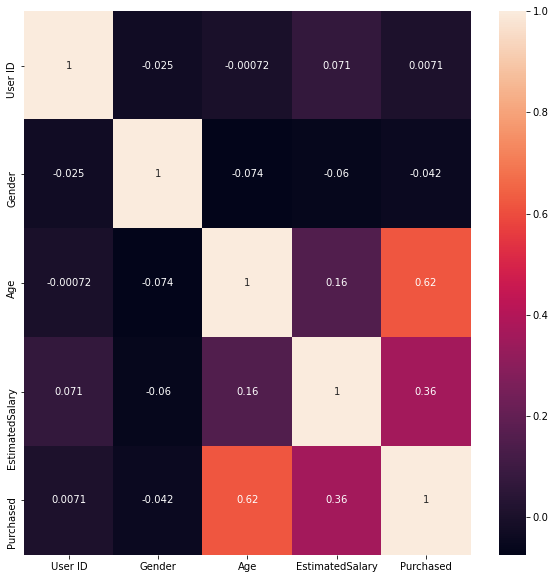

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [9]:
x=data.drop(['User ID','Gender','Purchased'],axis = 'columns')
y=data.Purchased

In [10]:
x.head(2)

,Age,EstimatedSalary
0,19,19000
1,35,20000


In [11]:
y.head(2)

0    0
1    0
Name: Purchased, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=4)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform (x_train)
X_test = sc.transform(x_test)

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc,roc_curve

In [18]:
#TEST SET
print("ACCURACY ON TEST SET:",accuracy_score(y_test,y_test_knn))
print(confusion_matrix(y_test,y_test_knn))
print(classification_report(y_test,y_test_knn))  # test set report


ACCURACY ON TEST SET: 0.8875
[[53  6]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        59
           1       0.75      0.86      0.80        21

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



In [19]:
# training set report
print("ACCURACY ON TRAIN SET:",accuracy_score(y_train,y_train_knn))
print(confusion_matrix(y_train,y_train_knn))
print(classification_report(y_train,y_train_knn))

ACCURACY ON TRAIN SET: 0.93125
[[185  13]
 [  9 113]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       198
           1       0.90      0.93      0.91       122

    accuracy                           0.93       320
   macro avg       0.93      0.93      0.93       320
weighted avg       0.93      0.93      0.93       320



In [20]:
s = 25
mean_acc =  np.zeros(s-1)
for n in range(1,s):
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(x_train , y_train)   #train model and predict
    y_hat = model_knn.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test , y_hat)
    print('accuracy at k=',n,'is',mean_acc[n-1]) 

accuracy at k= 1 is 0.7375
accuracy at k= 2 is 0.7375
accuracy at k= 3 is 0.7375
accuracy at k= 4 is 0.7375
accuracy at k= 5 is 0.7375
accuracy at k= 6 is 0.7375
accuracy at k= 7 is 0.7375
accuracy at k= 8 is 0.7375
accuracy at k= 9 is 0.7375
accuracy at k= 10 is 0.7375
accuracy at k= 11 is 0.7375
accuracy at k= 12 is 0.7375
accuracy at k= 13 is 0.7375
accuracy at k= 14 is 0.7375
accuracy at k= 15 is 0.7375
accuracy at k= 16 is 0.7375
accuracy at k= 17 is 0.7375
accuracy at k= 18 is 0.7375
accuracy at k= 19 is 0.7375
accuracy at k= 20 is 0.7375
accuracy at k= 21 is 0.7375
accuracy at k= 22 is 0.7375
accuracy at k= 23 is 0.7375
accuracy at k= 24 is 0.7375


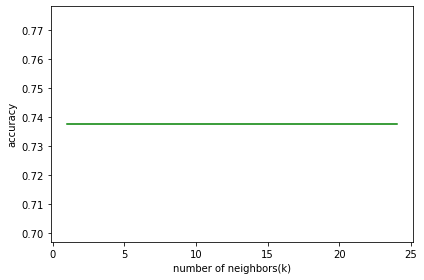

In [21]:
plt.plot(range(1,s),mean_acc,'g')
plt.ylabel('accuracy')
plt.xlabel('number of neighbors(k)')
plt.tight_layout()
plt.show()

In [22]:
error=[]
for i in range(1,40): #calculating error for k values between 1 and 40
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
error

[0.1625,
 0.15,
 0.1125,
 0.1125,
 0.1125,
 0.1,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.1,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.1,
 0.0875,
 0.0875,
 0.0875,
 0.075,
 0.075,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875,
 0.0875]

 k values and visualizing it to help your decision making.

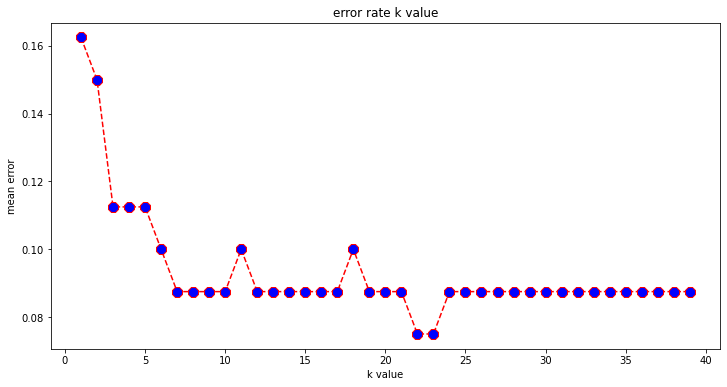

In [23]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='8',markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error');

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)

In [25]:
#test set report
print("ACCURACY ON TEST SET:",accuracy_score(y_test,y_test_knn))
print(confusion_matrix(y_test,y_test_knn))
print(classification_report(y_test,y_test_knn))  


ACCURACY ON TEST SET: 0.9125
[[54  5]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        59
           1       0.79      0.90      0.84        21

    accuracy                           0.91        80
   macro avg       0.88      0.91      0.89        80
weighted avg       0.92      0.91      0.91        80



In [26]:
# training set report
print("ACCURACY ON TRAIN SET:",accuracy_score(y_train,y_train_knn))
print(confusion_matrix(y_train,y_train_knn))
print(classification_report(y_train,y_train_knn)) 

ACCURACY ON TRAIN SET: 0.91875
[[186  12]
 [ 14 108]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       198
           1       0.90      0.89      0.89       122

    accuracy                           0.92       320
   macro avg       0.92      0.91      0.91       320
weighted avg       0.92      0.92      0.92       320




* For low values of k, the training score is high, while the testing score is low
* As the value of k increases, the testing score starts to increase and the training score starts to decrease.
* However, at some value of k, both the training score and the testing score are close to each other.

